# Online Advertisement Evaluation for TVs

Let's evaluate some online ads options to pick the best one.

In [1]:
import json
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt

import tinytroupe
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe.examples import create_lisa_the_data_scientist, create_oscar_the_architect
from tinytroupe.factory import TinyPersonFactory

from tinytroupe.extraction import ResultsExtractor


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: c:\Users\pdasilva\repos\TinyTroupe\examples\..\tinytroupe\utils\..\config.ini
Found custom config on: c:\Users\pdasilva\repos\TinyTroupe\examples\config.ini
TinyTroupe version: 0.6.0
Current date and time (local): 2026-01-15 16:11:14
Current date and time (UTC):   2026-01-15 19:11:14

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2024-08-01-preview
model = gpt-5-mini
reasoning_model = o3-mini
embedding_model = text-embedding-3-small
azure_embedding_model_api_version = 2023-05-15
max_completion_tokens = 128000
timeout = 480
max_attempts = 5
waiting_time = 0
exponential_backoff_factor = 5
max_concurrent_model_calls = 4
reasoning_effort = high
cache_ap

## Judging the best ad

Consider the following ads, obtained from real Bing queries.

In [2]:
# User search query: "55 inches tv"

# Ad targeting tech enthusiasts
tv_ad_1 =\
"""
The Ultimate Gaming Experience - LG 4K Ultra HD TV
https://www.lg.com/tv/oled
AdExperience Next-Level Gaming with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.

Infinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote

Exclusive Gaming Features
LG G2 97" OLED evo TV
Free Gaming Stand w/ Purchase
World's No.1 OLED TV
"""

# Ad targeting families
tv_ad_2 =\
"""
The Perfect Family TV - Samsung 4K & 8K TVs
https://www.samsung.com
AdBring Your Family Together with Samsung's 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie Nights and Family Gatherings.

Discover Samsung Event · Real Depth Enhancer · Anti-Reflection · 48 mo 0% APR Financing

The 2023 OLED TV Is Here
Samsung Neo QLED 4K TVs
Samsung Financing
Ranked #1 By The ACSI®

Perfect for Family Movie Nights
"""

# Ad targeting budget-conscious shoppers
tv_ad_3 =\
"""
Affordable 55 Inch TV - Wayfair Deals
Shop Now
https://www.wayfair.com/furniture/free-shipping
AdGet the Best Deals on 55 Inch TVs at Wayfair. High-Quality TVs at Budget-Friendly Prices. Free Shipping on All Orders Over $35.

Affordable Prices · Great Deals · Free Shipping
"""

Let's build a request for our agents to pick the best ad.

In [3]:
eval_request_msg = \
f"""
Can you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? 
Select **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.

# AD 1
```
{tv_ad_1}
```

# AD 2
```
{tv_ad_2}
```

# AD 3
```
{tv_ad_3}
```
"""

print(eval_request_msg)


Can you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? 
Select **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.

# AD 1
```

The Ultimate Gaming Experience - LG 4K Ultra HD TV
https://www.lg.com/tv/oled
AdExperience Next-Level Gaming with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.

Infinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote

Exclusive Gaming Features
LG G2 97" OLED evo TV
Free Gaming Stand w/ Purchase
World's No.1 OLED TV

```

# AD 2
```

The Perfect Family TV - Samsung 4K & 8K TVs
https://www.samsung.com
AdBring Your Family Together with Samsung's 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie Nights and Family Gatherings.

Discover Samsung Event · Real Depth Enhancer · Anti-Reflection · 48 mo 0% APR Financing

The 2023 OLED TV Is 

Let's also have a reason for them to require a new TV.

In [4]:
situation = "Your TV broke and you need a new one. You search for a new TV on Bing."

### Try with standard agents

To begin with, let's pick a pre-defined agent and ask him or her to perform the evaluations. To make it easier to change the chosen agent, we assign it to a variable first.

In [5]:
TinyPerson.all_agents

{}

In [6]:
lisa = create_lisa_the_data_scientist()

In [7]:
lisa.change_context(situation)

In [8]:
lisa.listen_and_act(eval_request_msg)

USER --> Lisa Carter: [CONVERSATION] 
          >  Can you evaluate these Bing ads for me? Which one convices you more to buy their
          > particular offering?  Select **ONLY** one. Please explain your reasoning, based on your
          > financial situation, background and personality.  # AD 1 ```  The Ultimate Gaming
          > Experience - LG 4K Ultra HD TV https://www.lg.com/tv/oled AdExperience Next-Level Gaming
          > with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect
          > for Gamers and Tech Enthusiasts.  Infinite Contrast · Self-Lighting OLED · Dolby Vision™
          > IQ · ThinQ AI w/ Magic Remote  Exclusive Gaming Features LG G2 97" OLED evo TV Free
          > Gaming Stand w/ Purchase World's No.1 OLED TV  ```  # AD 2 ```  The Perfect Family TV -
          > Samsung 4K & 8K TVs https://www.samsung.com AdBring Your Family Together with Samsung's
          > 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie
          > Nights and Family Gatherings.  Discover Samsung Event · Real Depth Enhancer · Anti-
          > Reflection · 48 mo 0% APR Financing  The 2023 OLED TV Is Here Samsung Neo QLED 4K (...)

2026-01-15 16:12:24,659 - MainThread(39740) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lisa Carter acts: [THINK] 
                 > I need to pick only one ad and explain why, using criteria relevant to my
                 > persona: relevance to my use cases (movie watching, tech interest), technical
                 > quality, value/price considerations (I have a stable tech salary but I'm value-
                 > conscious), and clarity of the ad (missing price or specs hurts trust). I'll
                 > compare each ad on those axes.  AD 1 (LG OLED): Pros: emphasizes picture quality
                 > (self-lighting OLED, Dolby Vision IQ), low response time and gaming features —
                 > matches a tech-enthusiast who values high fidelity video and low latency; offers
                 > a free gaming stand which is a tangible perk; brand positioning as a top OLED
                 > maker. Cons: no price shown, the flagship model (G2 97") is likely extremely
                 > expensive — potential overkill; ad is targeted at gamers which may or may not
                 > match my primary use case (I value movies and image quality more than competitive
                 > gaming). Overall signal: high quality, premium product, less price transparency.
                 > AD 2 (Samsung 4K & 8K): Pros: positions itself for family/movie nights, anti-r
                 > (...)

Lisa Carter acts: [TALK] 
                 > I choose AD 1 (LG 4K OLED). Reasoning: as a tech-savvy, quality-oriented person I
                 > care most about picture fidelity and low-latency performance — AD 1 highlights
                 > OLED, Dolby Vision IQ, and gaming-grade responsiveness, which align with my
                 > interests in high-quality movie watching and tech. Financially, I have a stable
                 > tech salary but remain value-conscious, so I'd want to confirm price and reviews
                 > before buying; the free gaming stand and strong brand positioning make the LG ad
                 > more convincing to me than the family-focused Samsung ad or the budget Wayfair
                 > offer. In short: AD 1 best matches my technical priorities and willingness to
                 > invest in premium quality.

Lisa Carter acts: [DONE] 
                 > Waiting for any follow-up or questions.

Let's extract from the agent's interaction the best ad chosen. In this manner, we can easily process results later.

In [9]:
extractor = ResultsExtractor()

extraction_objective="Find the ad the agent chose. Extract the Ad number and title."

res = extractor.extract_results_from_agent(lisa, 
                          extraction_objective=extraction_objective,
                          situation=situation,
                          fields=["ad_number", "ad_title"],
                          verbose=True)

res

2026-01-15 16:12:29,208 - MainThread(39740) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"ad_number": "AD 1", "ad_title": "The Ultimate Gaming Experience - LG 4K Ultra HD TV"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


{'ad_number': 'AD 1',
 'ad_title': 'The Ultimate Gaming Experience - LG 4K Ultra HD TV'}

We can then easily get the ad number and title from the results:

In [10]:
f"{res['ad_number']}: {res['ad_title']}"

'AD 1: The Ultimate Gaming Experience - LG 4K Ultra HD TV'

### Try with agents generated on the fly too

We don't really need to spend a lot of time customizing agents. We can create them on the fly from simple descriptions.

In [11]:
population_size = 30

In [12]:
factory = TinyPersonFactory.create_factory_from_demography("./information/populations/usa.json", 
                                                           population_size=population_size,
                                                           context=situation)

In [13]:
people = factory.generate_people(population_size, verbose=True)

2026-01-15 16:14:38,847 - ThreadPoolExecutor-0_0(18028) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-15 16:14:38,912 - ThreadPoolExecutor-0_0(18028) - tinytroupe - INFO - Sampling dimensions computed successfully.
2026-01-15 16:17:07,574 - ThreadPoolExecutor-0_0(18028) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-15 16:17:07,855 - ThreadPoolExecutor-0_0(18028) - tinytroupe - INFO - Sampling plan computed successfully.
2026-01-15 16:17:07,861 - ThreadPoolExecutor-0_0(18028) - tinytroupe - INFO - Sample plan has been flattened, contains 30 total samples.
2026-01-15 16:17:23,207 - ThreadPoolExecutor-0_0(18028) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-15 16:17:34,328 - ThreadPoolExecutor-0_0(18028) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-15 16:1

In [14]:
target_audience = TinyWorld(f"Target audience", people, broadcast_if_no_target=False)
target_audience.broadcast(eval_request_msg)
target_audience.run(1)


USER --> Rohan K. Mehta: [CONVERSATION] 
          >  Can you evaluate these Bing ads for me? Which one convices you more to buy their
          > particular offering?  Select **ONLY** one. Please explain your reasoning, based on your
          > financial situation, background and personality.  # AD 1 ```  The Ultimate Gaming
          > Experience - LG 4K Ultra HD TV https://www.lg.com/tv/oled AdExperience Next-Level Gaming
          > with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect
          > for Gamers and Tech Enthusiasts.  Infinite Contrast · Self-Lighting OLED · Dolby Vision™
          > IQ · ThinQ AI w/ Magic Remote  Exclusive Gaming Features LG G2 97" OLED evo TV Free
          > Gaming Stand w/ Purchase World's No.1 OLED TV  ```  # AD 2 ```  The Perfect Family TV -
          > Samsung 4K & 8K TVs https://www.samsung.com AdBring Your Family Together with Samsung's
          > 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie
          > Nights and Family Gatherings.  Discover Samsung Event · Real Depth Enhancer · Anti-
          > Reflection · 48 mo 0% APR Financing  The 2023 OLED TV Is Here Samsung Neo QLED 4K (...)

       + --> Lauren Akiko Sato

       + --> Isabella Marisol Mendoza-Reed

       + --> ...others...

2026-01-15 16:45:59,292 - MainThread(39740) - tinytroupe - INFO - [Target audience] Running world simulation step 1 of 1.


─────────────────────────────────────────── Target audience step 1 of 1 ───────────────────────────────────────────

2026-01-15 16:45:59,336 - MainThread(39740) - tinytroupe - INFO - [Target audience] No timedelta provided, so the datetime was not advanced.
2026-01-15 16:46:32,273 - ThreadPoolExecutor-1_0(33100) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rohan K. Mehta acts: [THINK] 
                    > Stepwise reasoning: 1) Personal priorities from my persona: prefer OLED for
                    > picture quality (movie nights), but family needs (child-safe content, anti-
                    > glare for bright living room), warranty/support, and reasonable total cost
                    > matter. 2) Financial posture: conservative saver with 6–12 months emergency
                    > fund; willing to spend in $900–$1,800 range for long-term value; open to
                    > financing if 0% APR and cashflow-friendly. 3) Compare ads quickly for fit: AD1
                    > (LG) emphasizes top-end OLED and gaming — great picture, but ad targets gamers
                    > and highlights a very large G2 97" model and gaming perks; doesn't call out
                    > anti-reflection or family features. AD2 (Samsung) emphasizes family-friendly
                    > features, anti-reflection (important for bright room), and 48‑month 0% APR
                    > financing plus brand/service signaling (ACSI). AD3 (Wayfair) is budget-focused
                    > (55") — tempting for immediate low cost but likely compromises on
                    > picture/warranty/support and doesn't match my preference for OLED for movie
                    > nights. 4) Trade-offs: LG = best picture ( (...)

Rohan K. Mehta acts: [TALK] 
                    > I pick AD 2 — the Samsung family-focused ad. Reasoning: as a family-focused
                    > buyer who still cares about picture quality, the Samsung message hits the
                    > practical priorities I actually weigh when replacing a broken living-room TV:
                    > anti-reflection (important because our living room has large windows), family-
                    > oriented features for movie nights with my daughter, and the 48‑month 0% APR
                    > financing makes a higher-quality set easier on cashflow. While AD1 (LG) tempts
                    > with top-tier OLED and stellar picture — which I value — its gaming focus and
                    > emphasis on very large, premium models makes it feel less tailored to our
                    > everyday family needs. AD3 (Wayfair) is attractive on price, but likely
                    > sacrifices the long-term picture quality, warranty/support, and calibration
                    > options I prefer. That said, before buying I'd still cross-check specs (Dolby
                    > Vision/HDR support, eARC, HDMI 2.1, anti-glare coating performance), read
                    > RTINGS/CNET reviews, and do an in-store side-by-side demo. But based on the ad
                    > copy and my financial/backgroun (...)

Rohan K. Mehta acts: [DONE] 
                    > Answer complete — selected AD 2 and explained reasoning.

2026-01-15 16:46:39,108 - ThreadPoolExecutor-1_7(6856) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rachel Meredith Anderson acts: [THINK] 
                              > Okay — I need to pick the ad that would actually convince me, given
                              > my household priorities. Main things I care about: family-friendly
                              > features (parental controls, simple apps), reliable brand and local
                              > service, in-store testing so I can check glare/menus and the remote,
                              > and a price/financing option that doesn't wreck our emergency fund
                              > (recent car repairs dented it). LG ad is flashy and aimed at gamers
                              > (great picture but likely overkill and expensive). Wayfair sounds
                              > cheapest but I'd worry about service, returns, and not being able to
                              > test the set in person. Samsung hits the family angle, mentions
                              > anti-reflection (good for our living room lamps), offers 0%
                              > financing (helpful given our budget squeeze), and the brand
                              > reputation/local support fits how Mark and I make decisions. So I'm
                              > leaning Samsung.

Rachel Meredith Anderson acts: [TALK] 
                              > I pick AD 2 — the Samsung 4K & 8K family-focused ad. Reasoning: it
                              > matches my real priorities as a busy family — family-friendly
                              > features and parental controls, anti-reflection for daytime viewing
                              > in our living room, and an established brand with local service
                              > options (I trust that more than a purely online bargain). The
                              > 48-month 0% APR financing is attractive since our emergency fund got
                              > hit recently, so spreading payments without extra interest could
                              > make a nicer TV doable without stretching us too thin. LG's gaming-
                              > forward pitch sounds great but it's more than we need and likely
                              > pricier; Wayfair's budget angle is tempting but I worry about
                              > returns, in-person testing, and repair/service support. Practical
                              > next steps I'd take: look for a 50–55" Samsung model in-store to try
                              > the remote/menus, confirm it has 3 HDMI ports and parental controls,
                              > and see if there are open-box/local pickup options or the financing
                              > terms that fit our budget.

2026-01-15 16:46:39,273 - ThreadPoolExecutor-1_4(18760) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rachel Meredith Anderson acts: [DONE] 
                              > Finished — recommended one ad and explained reasoning.

Wesley Dean Thornton acts: [THINK] 
                          > Okay — got three ads. I need to pick only one that would actually
                          > convince me to buy, given my background, budget, and how I shop. Step
                          > through each ad: 1) LG OLED gaming ad — looks mighty fine, top-tier
                          > picture and gaming features. But it's aimed at gamers/tech folks and
                          > even mentions a 97" G2 EVO. That's way out of my usual price range and
                          > overkill for family movie nights. OLED concerns: potential burn-in, and
                          > I'd want to see warranty/service options. I don't chase the absolute
                          > bleeding edge unless there's clear value or a sale. Also Elaine wants
                          > something simple. 2) Samsung family TV — talks family, anti-reflection
                          > (good for daytime football and bright rooms), financing (48 mo 0% APR
                          > could help spread cost), and a reputable brand. Mentions family features
                          > and a high ranking (ACSI) which I trust more than hype. Matches my
                          > preference for a reliable, well-supported brand, and sizes they offer
                          > (55–65") fit my living room plans and budget if there's a sale. 3)
                          > Wayfair budget 55" — low price is tempting, but Way (...)

Wesley Dean Thornton acts: [TALK] 
                          > I pick AD 2 — the Samsung family TV. Reasoning: I'm practical and
                          > cautious with money, and that ad speaks directly to family use — movie
                          > nights, easy-to-use features, and anti-reflection which matters in a
                          > bright living room. Samsung's reputation and the ACSI ranking give me
                          > more confidence about durability and service than a bargain listing. The
                          > 48-month 0% financing is useful if I need to spread payments without
                          > surprises, and the ad feels more in line with what Elaine and I would
                          > actually buy (simple, reliable, and good picture for sports and
                          > grandchildren). The LG gamer ad is impressive but overkill and likely
                          > too expensive for our budget and needs; the Wayfair bargain ad looks
                          > tempting on price but doesn't reassure me about returns, in-warranty
                          > service, or testing in-store. I'd still want to see the Samsung in
                          > person, check HDMI ports and an easy picture mode for sports, and buy
                          > during a sale or from a retailer with a straightforward return policy,
                          > but the Samsung ad is the one that convinces me most.

Wesley Dean Thornton acts: [DONE] 
                          > Finished — waiting for any follow-up.

2026-01-15 16:46:42,556 - ThreadPoolExecutor-1_3(12756) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Luna Reyes-Kim acts: [THINK] 
                    > Okay — read the three ads. Reminder of my situation: broken living-room TV,
                    > budget ~ $300–$600 (flex up to $800 if value clear), prefer 43" (might accept
                    > 50–55"), priorities: low input lag for gaming, good SDR/HDR upscaling for
                    > streaming, reliable smart OS (I like Google TV / Roku), anti-glare/anti-
                    > reflection for the living room, decent speakers or easy soundbar pairing,
                    > warranty/return confidence, and strong suspicion of marketing claims without
                    > review data. Emotional stuff: I want to restore Friday movie nights with
                    > friends and family streaming rituals; I’m budget-conscious and will wait for a
                    > deal or financing if needed.  Quick read of ads: - AD 1 (LG OLED): Strong
                    > gamer framing — "unmatched picture," "ultra-fast response time," OLED
                    > benefits. But ad is very high-end (mentions G2 97" and free gaming stand) and
                    > gives no price or input-lag numbers. OLED is tempting for picture quality, but
                    > historically OLEDs are expensive and risk of burn-in (I'd be cautious). Given
                    > my budget and shared-housing constraints,  (...)

Luna Reyes-Kim acts: [TALK] 
                    > I pick AD 2 — the Samsung ad. Reasoning: financiero-first — the 48‑month 0%
                    > APR financing makes a mid-range TV actually affordable for me without blowing
                    > the household budget, which matters because I’m trying to stay in the
                    > $300–$600 zone unless a clear-value deal appears. The anti-reflection callout
                    > is real useful for my living room (windows/lighting), and Samsung’s
                    > brand/retailer presence gives me more confidence about returns and warranty
                    > than a vague cheap listing. The family/movie-night framing also hits
                    > emotionally — replacing the TV means restoring Friday movie nights and Sunday
                    > streaming with familia.   Why not AD 1 (LG)? Pretty — and OLED is lovely for
                    > gaming — but that ad reads premium/aspirational (mentions huge OLEDs and
                    > gaming swag) with no prices or measured input-lag numbers. It’s tempting, but
                    > out of sync with my current budget and need for verifiable review data.   Why
                    > not AD 3 (Wayfair)? Too vague on specs (panel type, input lag, smart OS, HDMI
                    > count, warranty). Free shipping is nice, but I  (...)

Luna Reyes-Kim acts: [DONE] 
                    > Finished evaluation — waiting for any follow-up or to compare specific models
                    > you found.

2026-01-15 16:46:55,072 - ThreadPoolExecutor-1_11(33464) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Terrence Malik Brown acts: [THINK] 
                          > User asked me to pick only one ad and explain why, using my background
                          > and finances. I'll weigh each ad against what matters to me as a West
                          > Philly middle-school teacher with a family: 55–65" preferred size,
                          > bright living room with afternoon sun (so anti-reflection matters), good
                          > after-sales service and warranty, clear return policy, and a budget-
                          > conscious approach (I can spend up to about $700–900 for a reliable set,
                          > might consider open-box/refurb or wait for a sale; cautious about long
                          > financing). Also I value family features for movie nights and simple
                          > setup. Evaluate ads: 1) LG gaming OLED — top-tier picture and gaming
                          > features, but the example pushes a 97" model and premium positioning;
                          > that screams out-of-range for my household budget and is overkill for
                          > family movie nights. Great tech but misaligned with my practical needs.
                          > 2) Samsung family TV — calls out family/movie-night focus, mentions
                          > anti-reflection (important for my sunny living room), financing options
                          > (48 mo 0% APR could help if terms are cle (...)

Terrence Malik Brown acts: [TALK] 
                          > I pick AD 2 — the Samsung family TV. Reason: it matches what I actually
                          > need at home. The Samsung ad calls out anti-reflection (big plus for my
                          > living room that gets afternoon sun), stresses family/movie-night
                          > features (that’s how we use the TV), and includes a clear financing
                          > option and a reputation cue (#1 ACSI) that makes me feel more
                          > comfortable about warranty and support. The LG ad is great tech-wise but
                          > leans hard at gamers and giant, expensive sets (97" is wild for my
                          > budget and living room) — it’s more than I need and likely out of my
                          > price range. The Wayfair deal looks tempting on price for a 55" but
                          > doesn’t give me the same confidence about local service, returns, or
                          > long-term software support. Given my teacher salary and household goals,
                          > I want value, reliability, and easy service — Samsung checks those boxes
                          > best. For real, I’d still wait for a sale or consider open-box from a
                          > trusted retailer and use any Microsoft Rewards/gift cards I’ve stacked
                          > to shave the price, but of these three ads, Samsung (...)

Terrence Malik Brown acts: [DONE] 
                          > Finished — awaiting any follow-up questions.

2026-01-15 16:47:03,329 - ThreadPoolExecutor-1_1(33324) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lauren Akiko Sato acts: [THINK] 
                       > Constraints and priorities I should use: preferred screen size 65"–75",
                       > OLED preferred for cinematic picture but concerned about burn-in because my
                       > 6-year-old watches shows with static logos; I have discretionary budget
                       > (~$1,200–$3,500) and an emergency fund so financing is helpful but not
                       > required; I prefer retailers with good return/warranty
                       > (Costco/manufacturer) and will pay for pro calibration. Evaluate ads
                       > quickly: AD1 (LG) — strong on OLED, Dolby Vision and gaming features;
                       > targeted at gamers and cites a 97" G2 which is outside my usual size;
                       > doesn't mention family/anti-reflection/warranty/retailer. AD2 (Samsung) —
                       > positions as family TV, mentions anti-reflection, financing (48 mo 0% APR),
                       > Neo QLED (Mini-LED) which reduces burn-in risk compared to OLED, and a
                       > customer-satisfaction ranking; aligns with family-use robustness and room
                       > lighting concerns. AD3 (Wayfair) — budget 55" option, free shipping;
                       > cheaper but smaller than my ideal size and lacks brand/service/warranty
                       > details I care about. Weighing pi (...)

Lauren Akiko Sato acts: [TALK] 
                       > I pick AD 2 (Samsung). Reasoning: as someone who cares about picture
                       > quality but lives with a young child and prefers durability, the Samsung
                       > pitch addresses the real practical trade-offs — anti-reflection for
                       > brighter rooms, Neo QLED/Mini-LED that avoids OLEDu0000s higher burn-in
                       > risk with static logos, and an explicit financing option that broadens
                       > flexibility. The family-oriented framing and the ACSI ranking signal
                       > reliability and user-satisfaction, which I value more than a pure gamer-
                       > oriented spec sheet. LGu0000s ad is tempting for OLED/Dolby Vision and low
                       > latency for gaming, but the gaming-focused message and the push of an
                       > oversized 97" model feel misaligned with my living-room constraints and
                       > child-friendly concerns. Wayfairu0000s budget 55" offer is too small and
                       > lacks the warranty/retailer support I prefer. Practically, Iu0000d still
                       > run my usual research steps (RTINGS/The Verge, watch a 20u000320-minute
                       > video review, check retail return/warranty terms — ideally Costco or
                       > manufacturer direct) and t (...)

Lauren Akiko Sato acts: [DONE] 
                       > Finished evaluation; waiting for follow-up or questions.

2026-01-15 16:47:08,280 - ThreadPoolExecutor-1_8(1128) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Katherine Elise Olson acts: [THINK] 
                           > Received request to pick only one ad and explain why, using my
                           > financial situation and persona. Relevant criteria to weigh: total cost
                           > and financing, reliability/service/warranty, picture quality for
                           > animation (Hannah) and low input lag for gaming (Ethan), burn-in risk
                           > (OLED concern with kids), anti-reflection for bright living room,
                           > trusted retail channels and return policies (Costco/Best Buy
                           > preference), size suitability (55–65" target), and propensity to verify
                           > with Rtings/Consumer Reports and in-store viewing. I should favor
                           > pragmatic, family-friendly value over niche high-end gaming claims
                           > unless the premium is justified. Also weigh marketing signals: LG ad
                           > targets gamers with high-end OLED claims (likely expensive, burn-in
                           > risk), Samsung ad emphasizes family features, anti-reflection,
                           > financing and high customer-satisfaction ranking (aligns with my
                           > preference for reliable service), Wayfair ad emphasizes low price but
                           > lacks signals about reliability, warranty, or in-store support.
                           > Conclusion forming: Sam (...)

Katherine Elise Olson acts: [TALK] 
                           > From a finance and family perspective, I would pick Ad 2 (Samsung 4K &
                           > 8K TVs). Briefly: Samsung strikes the best balance between picture
                           > performance for family movie nights, practical features for a bright
                           > living room (anti-reflection), and signals of reliable
                           > service/financing that match my risk-averse buying style.  One, family
                           > fit: the ad explicitly markets "family-friendly features" and anti-
                           > reflection — important for our daytime living room and for Hannah's
                           > animation (color/clarity) and Ethan's casual gaming. Two, service and
                           > reliability: the ACSI ranking and the 48-month 0% APR financing are
                           > meaningful to me — they suggest customer satisfaction and a way to
                           > preserve liquidity (I’d still prefer to use a rewards card but
                           > financing is a useful option if needed). Three, lower perceived risk
                           > than OLED: LG's OLED ad is compelling for gamers, but I worry about
                           > burn-in with family use and the likely higher price; that doesn't align
                           > with my desire to avoid preventable replacement costs. Four, Wayfair’s
                           > budget p (...)

Katherine Elise Olson acts: [DONE] 
                           > Completed recommendation and reasoning.

2026-01-15 16:47:16,079 - ThreadPoolExecutor-1_2(29336) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Marisol Mendoza-Reed acts: [THINK] 
                                   > Quick run-through: read the three ads and evaluate vs my
                                   > priorities (budget, gaming features, warranty/return policy,
                                   > store trust, room glare, urgency because old TV died mid-
                                   > season). Financial reality: ~$2,500 credit card debt, $1,800
                                   > personal loan, $1,200 savings — so I prefer $350–$700 but can
                                   > stretch to ~$900 if financing/warranty makes sense. Persona
                                   > prefs: I like OLED for color and editing, but I also care about
                                   > HDMI 2.1, low input lag, eARC, and reliable post-sale support
                                   > (Best Buy/Costco preferred). Ad impressions: LG ad screams
                                   > premium/gamer-focused (Dolby Vision, OLED) but mentions a 97"
                                   > G2 — clearly out of budget and unrealistic for my apartment.
                                   > Wayfair ad is tempting on price/55" fit but is vague on specs
                                   > and warranty — and I distrust generic 'deals' for electronics
                                   > without clear return/warranty. Samsung ad includes 48-mo 0% APR
                                   > financing, anti-reflection (good for my window), family
                                   > features, and brand-level support — that directly addresses my
                                   > budget constraint and apartment needs. Caveat: Sams (...)

Isabella Marisol Mendoza-Reed acts: [TALK] 
                                   > I pick AD 2 — the Samsung 4K & 8K TV ad. Reasoning (short):
                                   > financially it’s the most convincing — the 48-month 0% APR
                                   > financing makes replacing my dead TV doable without wrecking my
                                   > small emergency fund, which matters because I’ve got credit-
                                   > card and loan balances. Practically, Samsung’s anti-reflection
                                   > and family-oriented features match my living-room (big window,
                                   > watch parties with Sofía), and the brand usually gives decent
                                   > post-sale support — I prefer buying from a retailer with a
                                   > clear return/warranty process. I’m cautious though: the ad
                                   > doesn’t list gaming specs (HDMI 2.1, VRR, input lag) or HDR
                                   > format (Samsung often uses HDR10+ not Dolby Vision), so before
                                   > I’d actually buy I’d check those things, watch a couple 15–20
                                   > min YouTube hands-on reviews, and try to purchase through Best
                                   > Buy/Costco (or a Samsung promo) so I get a reliable return
                                   > window and an optional protection plan. OK, cool — that’s my
                                   > pick and why.

Isabella Marisol Mendoza-Reed acts: [DONE] 
                                   > Finished — waiting if you want deeper spec checks or a buying-
                                   > plan (where to buy, what models to compare).

2026-01-15 16:47:25,557 - ThreadPoolExecutor-1_10(33964) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-15 16:47:25,614 - ThreadPoolExecutor-1_5(38080) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mark Sebastian O'Neill-Rossi acts: [THINK] 
                                  > I should weigh each ad against my known preferences: I
                                  > prioritize OLED picture quality, calibration and long-term
                                  > value; I worry about OLED burn-in and firmware/support; I also
                                  > care about family use and room brightness (anti-reflection) and
                                  > value good warranties and white-glove installation. Financially
                                  > I'm comfortable in the 1,500 to 4,000 dollar range for a 65-inch
                                  > set and am research-first before buying. Evaluate ads quickly:
                                  > AD 1 (LG) = clear OLED messaging, Dolby Vision IQ, gaming
                                  > features are mostly noise for me but imply low input lag and
                                  > strong processing; AD 2 (Samsung) = family-friendly, anti-
                                  > reflection and financing are attractive for bright rooms and
                                  > budgeted purchases, but the ad mixes Neo QLED and references
                                  > that reduce clarity about exact panel tech; AD 3 (Wayfair) =
                                  > budget offering, no technical detail, low confidence for long-
                                  > term value or support. Tradeoffs: my home setup and viewing
                                  > habits favor deep blacks and calibrated cinema experience
                                  > (OLED), and I will accept burn-in risk if vendor/fi (...)

Ousmane Traore acts: [THINK] 
                    > Read ads. AD1 = LG gaming, very high-end (97" mention), not for our budget or
                    > family use. AD2 = Samsung, family focus, brand I know, 4K/8K, financing 48 mo
                    > 0% APR — good if monthly small and clear but long term worries. AD3 = Wayfair
                    > cheap 55" — price sounds good, free shipping, but I prefer to see TV in person
                    > and know seller; online-only seller makes me cautious because of returns and
                    > unknown brand. My priorities: family viewing, 43–55", easy smart apps
                    > (YouTube/Netflix), at least 2 HDMI, simple remote, 1-year warranty, price
                    > $150–$450 if possible but can stretch a little with transparent monthly
                    > payment. I must pick one ad that convinces me most: Samsung (AD2) wins because
                    > brand trust, family features, and financing could make it possible, but I
                    > would still check price, monthly cost, return policy, and try to see the TV in
                    > store before buying.

Mark Sebastian O'Neill-Rossi acts: [TALK] 
                                  > I pick AD 1 (LG). Reasoning: as someone who values picture
                                  > quality, calibration, and long-term value—and who is comfortable
                                  > spending in the 1.5k–4k range for a 65-inch set—the LG OLED
                                  > message is the most persuasive. The ad emphasizes self-lighting
                                  > OLED and Dolby Vision IQ, which align with my desire for deep
                                  > blacks and a cinematic, calibrated experience. The gaming-
                                  > centric language is largely marketing noise for me, but it
                                  > signals low input lag and strong processing, which is a plus. AD
                                  > 2 (Samsung) has attractive family-focused features—anti-
                                  > reflection and 0% APR financing—which matter if my room is
                                  > bright or I want to stretch payments, but the ad is less clear
                                  > about the exact panel benefits I prioritize. AD 3 (Wayfair) is a
                                  > budget play with insufficient technical detail or assurance
                                  > about longevity, warranty, or calibration support, so it fails
                                  > on my research-first criteria. Practical next steps before
                                  > buying: check RTINGS/HDTVTest and user forums for burn-in data
                                  > on the exact LG model, confirm firmware upda (...)

Ousmane Traore acts: [TALK] 
                    > I choose AD 2 — the Samsung family TV. For me, brand trust is important (I
                    > have heard good things about Samsung in the community), and the ad talks about
                    > family features and easy picture — that fits our movie nights and watching
                    > news from Mali. The financing offer could help if the monthly payment is small
                    > and transparent, because I do not have big cash now. I am still cautious: I
                    > would want to see the TV in person (43–55" size), check menus and apps
                    > (YouTube, Netflix), confirm at least 2 HDMI ports and simple remote, and make
                    > sure return policy is clear. AD1 is too gaming/high-end and too expensive; AD3
                    > is cheap but online-only and I worry about seller trust and returns. So
                    > Samsung convinces me most, with conditions: check price, monthly payment, and
                    > inspect in store before buying.

Mark Sebastian O'Neill-Rossi acts: [DONE] 
                                  > Waiting for any follow-up questions or requests to dig into
                                  > specific models or the trade-offs in more detail.

Ousmane Traore acts: [DONE] 
                    > Finished answer; waiting for any follow-up questions.

2026-01-15 16:47:41,615 - ThreadPoolExecutor-1_6(12708) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mateo Julian Johnson acts: [THINK] 
                          > Quick run-through: I gotta pick one ad based on my situation — broke-ish
                          > but need a working TV right now (old 55" plasma just died). Budget
                          > target $300-500, can stretch to $700 if it makes sense; absolute max
                          > ~$900 but that would stress my card (got ~$2.5k CC balance and only
                          > ~$500 emergency). I care about gaming: low input lag, at least 60–120Hz,
                          > 50–55" size fits the apartment; I want Ethernet or reliable Wi‑Fi, 2
                          > HDMI ports (HDMI 2.1 preferred). I also care about warranty/returns and
                          > testing in person if possible.  Ad 1 (LG OLED): Sounds dreamy — OLED,
                          > self-lighting, Dolby Vision, ultra-fast response. But the ad name drops
                          > a 97" G2 — that's crazy expensive and overkill for my place. Even
                          > smaller LG OLEDs are typically way above my budget. Free gaming stand
                          > doesn't make up for the big price. Tech-wise it's ideal for gaming, but
                          > financially it's unrealistic right now.  Ad 2 (Samsung Neo QLED /
                          > Samsung financing): Samsung is solid, anti-reflection and family
                          > features are useful in an apartment with streetlight (...)

Mateo Julian Johnson acts: [TALK] 
                          > I pick AD 3 — the Wayfair "Affordable 55 Inch TV". Reason: right now I
                          > need a working 55" that won’t blow my budget. LG OLED (Ad 1) is awesome
                          > tech but way out of reach. Samsung (Ad 2) looks legit but the 48‑month
                          > financing scares me — I already carry credit-card debt and don’t wanna
                          > lock into years of payments without knowing the exact price. Wayfair’s
                          > ad matches my size and price needs (free shipping helps), which is what
                          > matters when rent and food come first.   That said, I’d be careful:
                          > before buying I’d get the model number, check refresh rate/input lag and
                          > HDMI ports, read RTINGS or verified reviews, confirm a 14–30 day return
                          > and at least a 1‑year warranty, and consider open‑box Best Buy or local
                          > Marketplace tests if the specs look weak. If Wayfair’s model checks
                          > basic gaming boxes (60–120Hz and decent input lag) and the price sits in
                          > my $300–500 range, I’d pull the trigger. Otherwise I’d wait and chase a
                          > short-term sale or open‑box deal.

Mateo Julian Johnson acts: [DONE] 
                          > Finished — recommended AD 3 with reasoning and next steps.

2026-01-15 16:47:51,087 - ThreadPoolExecutor-1_7(6856) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ana Sofia Delgado acts: [THINK] 
                       > Okay, I need to pick only one ad and explain why from my perspective.
                       > Criteria I care about: price (target $400–$550 ideally), brand trust
                       > (Samsung, TCL, Vizio preferred), family features (Spanish menus, parental
                       > controls), reliable return policy and delivery/installation options, good
                       > motion for soccer, clear financing only if monthly < ~$40 and no hidden
                       > interest, and durability (kid- and kitchen-safe). Evaluate each ad quickly:
                       > AD1 (LG) reads like high-end gaming — great picture but likely way over my
                       > budget and features I don't need (gaming extras). AD2 (Samsung) speaks
                       > directly to family, mentions anti-reflection (good with daylight), 0% APR
                       > financing (useful if monthly fits budget), Samsung is a brand I trust and
                       > likely has decent in-store return/exchange options. AD3 (Wayfair) promises
                       > low price and free shipping but is vague on brands/specs and Wayfair
                       > listings can include unknown manufacturers; I'm wary about returns,
                       > warranty service, and real-world motion handling. Given my finances and
                       > that this i (...)

Ana Sofia Delgado acts: [TALK] 
                       > I pick AD 2 — Samsung. Why? Porque soy mamá y el tele es para la familia:
                       > necesito buena imagen para el fútbol, controles parentales para Lucia, y
                       > menús/soporte en español. Samsung es una marca que confío más que una
                       > oferta muy barata de Wayfair o el anuncio de lujo de LG que seguro sale muy
                       > caro. The 48‑month 0% APR is useful if the monthly payment stays low, and
                       > Samsung/Big retailers usually have clearer return and delivery options —
                       > eso me importa mucho porque no quiero problemas con la instalación o
                       > garantía when Lola or kids are around. En resumen: Samsung fits my
                       > practical needs and risk tolerance better than the other two.

Ana Sofia Delgado acts: [DONE] 
                       > Finished — selected AD 2 and explained reasoning.

2026-01-15 16:47:54,654 - ThreadPoolExecutor-1_9(844) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Camila Chen-Santos acts: [THINK] 
                        > I need to pick only one ad and justify it using my budget, living
                        > situation, and preferences. Criteria I care about: price (I usually aim
                        > $300–$600, can stretch to ~$700), size (prefer ~50–55" for the living
                        > room), picture quality (4K + HDR important), low input lag for gaming,
                        > trustworthy retailer/warranty/returns (I prefer Best Buy/Target or
                        > manufacturer support), and practical features for roommate/movie nights
                        > (anti-reflection, easy smart UI). Also I dislike long, risky financing
                        > unless 0% and I understand terms.  Evaluate ads quickly: - AD 1 (LG OLED
                        > gaming): top-tier picture and gaming features, but clearly premium (e.g.,
                        > G2 97" and OLED evo language). Way over my budget for a replacement right
                        > now. I'd love it for Hades/Halo nights, but financially unrealistic
                        > without heavy financing or a windfall. - AD 2 (Samsung Neo QLED / family):
                        > positions quality (Neo QLED), practical features (anti-reflection), and
                        > importantly offers 48-month 0% APR financing. Samsung is a known brand
                        > with decent support and repa (...)

Camila Chen-Santos acts: [TALK] 
                        > I pick AD 2 — the Samsung (Neo QLED / family TV). La verdad, it feels like
                        > the best practical fit for me right now. Why: Samsung gives me brand trust
                        > and useful real-world features (anti-reflection for daytime watch parties,
                        > family-friendly UX), and that 48‑month 0% APR financing actually makes a
                        > nicer 50–55" set attainable without wiping out my emergency fund. I am
                        > budget-conscious (I keep ~2 months' rent saved and usually aim for
                        > $300–$600, can stretch to about $700), so I wouldn't buy the LG OLED ad
                        > outright — it's gorgeous but way out of range. Wayfair's cheap 55" ad is
                        > tempting on price, but it doesn't list important specs, warranty, or
                        > retailer support, and I prefer buying from retailers/manufacturers with
                        > easy returns and reliable firmware updates.  That said, before I pull the
                        > trigger on Samsung I'd do three things: 1) check real input-lag and HDR
                        > performance (I care about gaming and picture), 2) look for open-box/sales
                        > at Best Buy or Samsung to lower the price, and 3) confirm the
                        > return/firmware/upda (...)

Camila Chen-Santos acts: [DONE] 
                        > Finished — waiting if you want me to compare specific models/price links
                        > or check open-box deals.

2026-01-15 16:47:56,942 - ThreadPoolExecutor-1_0(33100) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jason Robert Mancini acts: [THINK] 
                          > Read the three ads and weigh them against my priorities: family use,
                          > durability, budget, and local service. Key points: I prefer a midrange
                          > reliable set (I was willing to spend ~$700–$1,000 for a 65"), wife wants
                          > easy apps for the kids, my living room has a big window so
                          > anti‑glare/anti‑reflection matters, and I worry about OLED burn‑in
                          > because I watch sports with static score bugs. AD1 (LG OLED) is gorgeous
                          > and great for gaming but looks pricey (97" mention) and OLED burn‑in is
                          > a real worry for me. AD3 (Wayfair budget 55") is cheap but Wayfair isn't
                          > a dedicated electronics retailer and I'm worried about support/warranty
                          > and long‑term reliability. AD2 (Samsung) offers Neo QLED (no OLED
                          > burn‑in worry), anti‑reflection, family features, and 0% financing —
                          > fits my pragmatic needs. I should pick only one and explain why Samsung
                          > best matches my situation.

Jason Robert Mancini acts: [TALK] 
                          > I pick AD 2 — the Samsung family TV. Reason: I want something reliable
                          > and practical for the whole family, not the flashiest gaming set.
                          > Samsung's Neo QLED/Neo tech gives a bright picture without the OLED
                          > burn‑in worry (important since I watch a lot of sports with score bugs).
                          > Anti‑reflection is a real plus for my living room with that big window —
                          > I prefer a matte-ish look so glare isn't an issue. The family features
                          > and easy apps fit what Emily and the kids need, and Samsung's
                          > brand/reputation means local service and a clearer warranty path if
                          > something goes wrong. The 48‑month 0% financing is handy if price is
                          > tight, though I'd read the terms first. LG's ad looks great for gamers,
                          > but a 97" OLED is overkill, expensive, and I'm uneasy about burn‑in. The
                          > Wayfair 55" deal is tempting on price, but I don't trust support or
                          > longevity from a non‑specialty seller. Bottom line: Samsung balances
                          > picture quality, durability, and family usability — that convinces me.

Jason Robert Mancini acts: [DONE] 
                          > Waiting for any follow-up questions.

2026-01-15 16:48:12,310 - ThreadPoolExecutor-1_4(18760) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Dorothy Ann Keller acts: [THINK] 
                        > Read the three ads and weigh them against my preferences and finances.
                        > Important facts from my persona: budget roughly $400–$800; I prefer
                        > 43"–55" TVs, simple remotes, in‑store demos, delivery + haul‑away and a
                        > short hands‑on tutorial; I trust familiar brands (Samsung) and dislike
                        > being upsold or pushed into tech I won't use. Now evaluate each ad
                        > quickly: AD1 (LG gaming, mentions 97" OLED and gaming features) — sounds
                        > very high end, aimed at gamers, likely far above my budget and includes
                        > many features I don't need. AD3 (Wayfair 55" deals) — the size is right
                        > and price likely fits, free shipping is nice, but Wayfair is primarily
                        > online and I won't get an in‑store demo or a simple hands‑on lesson;
                        > haul‑away/installation and a simple remote may be uncertain. AD2 (Samsung
                        > family TV) — Samsung is a familiar, trusted brand; ad emphasizes
                        > family‑friendly features, anti‑reflection (good for daytime), financing
                        > (0% APR for 48 months) which could help spread cost though long financing
                        > makes me a little nervous; it als (...)

Dorothy Ann Keller acts: [TALK] 
                        > I would pick AD 2 — the Samsung family TV ad. As someone on a modest fixed
                        > budget who prefers familiar brands and an in‑person buying experience,
                        > Samsung feels the most reassuring: it talks about family‑friendly features
                        > (the shows I watch), anti‑reflection for daytime viewing, and it’s a brand
                        > I’m comfortable finding in a store to see a demonstration and ask for
                        > delivery plus a brief tutorial. The 0% financing sounds helpful but I’d be
                        > cautious about a 48‑month plan — I wouldn’t want to stretch my rainy‑day
                        > fund too thin. AD1 sounds like a fancy gaming set far beyond what I need,
                        > and AD3 might be a good bargain on size but likely won’t give me the
                        > in‑store help, haul‑away, or hands‑on demo I want. So Samsung wins for
                        > trust, likely support, and features that fit my viewing habits.

Dorothy Ann Keller acts: [DONE] 
                        > Waiting for any follow-up questions or if you'd like me to narrow models
                        > or check what to ask for in store.

2026-01-15 16:48:14,984 - ThreadPoolExecutor-1_3(12756) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Claire Chen-Foster acts: [THINK] 
                        > I should evaluate the three ads against my personal buying criteria:
                        > preferred panel (OLED), target size (65–77"), useful specs (Dolby Vision,
                        > HDMI 2.1, low input lag), anti-glare for daytime viewing,
                        > reliability/community feedback, and reasonable price justification given
                        > our household budget. Quick read: AD1 = LG OLED, gaming-focused, mentions
                        > Dolby Vision and 'OLED evo' (aligns with my picture-quality preference).
                        > AD2 = Samsung Neo QLED, family-focused, mentions anti-reflection and
                        > financing (useful for family use and glare concerns, but not OLED). AD3 =
                        > Wayfair budget 55" (price-oriented, below my preferred size and panel).
                        > Given my personality (research-first, AV-savvy, willing to pay for
                        > measurable gains) I should prefer the ad that signals the highest
                        > alignment with technical picture-quality priorities while still flagging
                        > caveats I would verify. I'll pick one and explain both why it convinces me
                        > and what I'd still check before buying.

Claire Chen-Foster acts: [TALK] 
                        > I pick AD 1 (LG 4K OLED). Reasoning: 1) Aligns with my top priority: OLED
                        > panels for deep blacks and cinematic contrast (I prefer OLED for the
                        > living room). 2) Mentions Dolby Vision and 'OLED evo' which signal
                        > HDR/brightness improvements I care about for movie nights. 3) Calls out
                        > gaming features and fast response time — useful since I value low input
                        > lag for occasional gaming and for general motion handling. 4) Financially,
                        > our household can absorb a premium for clear, measurable quality
                        > improvements; I'm a research-first buyer, so an ad that signals technical
                        > leadership is persuasive as a starting point. Caveats I'd verify before
                        > purchase: confirm the specific size I want (65–77" rather than a 97"
                        > flagship), measured peak brightness and color volume (RTINGS/MKBHD),
                        > number of HDMI 2.1 ports and true 120Hz performance, anti-reflection
                        > performance for late-afternoon glare, warranty/firmware update policy, and
                        > owner forums for any panel-lottery or burn-in reports. AD2's
                        > family/financing pitch is sensible for pr (...)

Claire Chen-Foster acts: [DONE] 
                        > Turn complete.

2026-01-15 16:48:15,895 - ThreadPoolExecutor-1_11(33464) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Diego Alvarez-Powell acts: [THINK] 
                          > Okay — evaluate ads from perspective of Diego: budget $300–$450, target
                          > 43–50", wants low input lag for gaming, built-in apps (Roku/Android
                          > preferred), price-sensitive, prefers refurbished/open-box, delivery to a
                          > walk-up matters. Compare convictions: LG is premium/too expensive;
                          > Samsung offers long financing but is family-focused and vague on gaming
                          > specs; Wayfair is cheap and free-shipping but vague on tech details. I
                          > should pick the ad that best matches my financial constraints and
                          > practical priorities.

Diego Alvarez-Powell acts: [TALK] 
                          > I pick AD 3 (Wayfair: Affordable 55" TV). Reason: being honest — my
                          > wallet rules first. The LG ad is drool-worthy (OLED, top-tier features)
                          > but that’s outta my budget and sounds like a flex purchase, not
                          > something I can justify right now. Samsung’s ad with 0% APR sounds
                          > tempting, but 48 months financing = long commitment and I’m wary of
                          > stretched payments; also the ad talks about family features, not the low
                          > input lag or responsive smart UI I need for gaming. Wayfair’s ad wins
                          > because it hits my big constraint: price + free shipping. Free shipping
                          > matters with my walk-up and thin budget. Even if it’s a 55" (a bit
                          > bigger than my target 43–50), if the price is right I’d consider it.
                          > Caveats: Wayfair ad doesn’t mention input lag, smart platform, or return
                          > policy — so before ordering I’d check user reviews, confirm the TV’s OS
                          > (want Roku/Android or a known responsive UI), test input lag numbers if
                          > possible, and make sure returns are easy. If Wayfair listing checks out
                          > on those, I’d pull the trigger; if not, I’d s (...)

Diego Alvarez-Powell acts: [DONE] 
                          > Finished evaluation; waiting for follow-up or questions.

2026-01-15 16:48:26,078 - ThreadPoolExecutor-1_1(33324) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gary Allen Mitchell acts: [THINK] 
                         > Alright — weigh the ads against what matters to me: family use with
                         > grandkids, budget and financing, brand/service reputation, size
                         > (55"–65"), simplicity, and durability. LG's ad is obviously for gamers
                         > and even lists a 97" G2 — that's way more than I need and would be a real
                         > stretch financially. Samsung looks tuned to family use, mentions anti-
                         > reflection (good for daytime TV and sports), and that 48-month 0% APR
                         > financing makes a nicer TV doable on a modest income. Wayfair is cheapest
                         > and hits my size preference for a 55", but I'm wary of thin plastics,
                         > limited local support, and returns — I prefer to buy where I can see the
                         > picture and get in-person help. Given my conservative finances and
                         > preference for trusted brands and local service, Samsung seems the most
                         > convincing.

Gary Allen Mitchell acts: [TALK] 
                         > I pick AD 2 — the Samsung family TVs. Let me tell ya why: first, it's
                         > aimed at family use, which is what I'd be buying for — movie nights with
                         > the grandkids and Sunday football. The ad calls out anti-reflection and
                         > family-friendly features, which matter in a sunny living room. Also, I
                         > trust Samsung as a brand more than some unknown bargain seller, and they
                         > have local store support if something goes sideways. The 48‑month 0% APR
                         > financing is important too — I'm cautious with cash but that makes a
                         > nicer set affordable over time without high interest. LG's ad is flashy
                         > and aimed at gamers (and even a 97" set — way overboard and expensive for
                         > me). Wayfair's cheap 55" deal is tempting on price, but I worry about
                         > build quality, thin plastics, and weak local service or returns. So based
                         > on my budget, practical needs, and wanting something reliable and easy
                         > for my family to use, Samsung convinces me most. If I were buying, I'd
                         > still go look at the set in person at a local store, ask about
                         > mounting/haul‑away and get a (...)

Gary Allen Mitchell acts: [DONE] 
                         > Waiting for any follow-up questions.

2026-01-15 16:48:36,897 - ThreadPoolExecutor-1_8(1128) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Melissa Anne Davenport acts: [THINK] 
                            > Task: pick one ad and explain why, using my financial situation and
                            > persona. Checklist: budget (~$700–$1,500), family use (movie nights,
                            > sports), parental controls, soundbar plan, picture/motion handling,
                            > low input lag for occasional gaming, warranty/support, ease of
                            > setup/installation, store financing/trade-in, professional reviews.
                            > Quick read of ads: AD1 = LG gaming/OLED (high-end, likely expensive,
                            > excellent picture, gaming features). AD2 = Samsung family-focused,
                            > anti-reflection, 48-mo 0% APR, ranked #1 ACSI (customer satisfaction),
                            > mentions Neo QLED and 2023 OLED. AD3 = Wayfair budget 55" (cheap,
                            > vague specs, may lack warranty/support details). Evaluate vs. my
                            > decision drivers: longevity, service, clear specs (HDR types, HDMI
                            > count), parental controls, energy efficiency, price + warranty.
                            > Samsung ad aligns best with family priorities and total cost-of-
                            > ownership; LG is best if gaming is primary and budget is high; Wayfair
                            > is tempting price-wise but too many unknowns and potential
                            > reliability/warranty risk (...)

Melissa Anne Davenport acts: [TALK] 
                            > I pick AD 2 — Samsung (The Perfect Family TV). Reasoning, from my
                            > situation and how I make decisions:  - Fit with family needs: the ad
                            > explicitly targets family movie nights and gatherings, which matches
                            > our primary use (news in the morning, sports and movies on weekends)
                            > and the need for easy parental controls and multiple profiles. -
                            > Practical features: anti-reflection is a real plus in our living room
                            > (less glare with windows and daytime viewing). Samsung’s Neo QLED line
                            > typically offers good motion handling for sports, which is one of my
                            > top deal-breakers. - Service and total cost of ownership: the ad
                            > highlights financing (48 mo 0% APR) and a high customer-satisfaction
                            > ranking (ACSI). I value clear post-sale support and easy returns; a
                            > brand with good U.S. support and financing options reduces risk to our
                            > emergency fund and makes installation/repair less painful. - Balance
                            > of specs vs price: compared to AD1 (LG OLED), Samsung is a more
                            > pragmatic middle ground for a family — LG’s OLEDs are stunning but usu
                            > (...)

Melissa Anne Davenport acts: [DONE] 
                            > Finished — waiting for any follow-up or to run those quick checks I
                            > mentioned.

2026-01-15 16:48:41,070 - ThreadPoolExecutor-1_10(33964) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nicole Harper acts: [THINK] 
                   > Lemme see — what really matters to me as Nicole: price/budget (I usually target
                   > $500–900), size (55"–65"), family-friendly features (parental controls, anti-
                   > glare), reliable brand and warranty, easy returns and delivery, and financing
                   > if I need it. Also I like to inspect demo units in-store before buying. Now
                   > evaluate each ad step by step: AD 1 (LG gaming OLED) — sounds fantastic
                   > picture-wise but it's clearly high-end/gamer-focused, likely way outside my
                   > normal budget and overkill for family movie nights; free gaming stand and
                   > ultra-fast response are perks I don't need. AD 2 (Samsung family 4K/8K) —
                   > explicitly family-focused, mentions anti-reflection (handy with our living room
                   > windows), 48-month 0% APR financing would make a nicer set affordable without
                   > wiping savings, ranked #1 and Samsung is a trusted brand I wouldn't feel
                   > awkward buying; still would want to check in-store demo and warranty/return
                   > terms. AD 3 (Wayfair affordable 55") — price-first pitch is tempting, but
                   > Wayfair isn't my usual place for TVs (...)

Nicole Harper acts: [TALK] 
                   > I pick AD 2 — the Samsung family TV ad. Here's why: it lines up with what I
                   > actually need — family-friendly features, anti-reflection for our bright living
                   > room, and a trusted brand name. The 48‑month 0% APR makes a nicer set doable
                   > without draining our savings, and seeing it ranked well gives me more
                   > confidence. AD 1 (the LG gamer ad) is gorgeous but feels like overkill and
                   > probably too pricey for our family use. AD 3 (Wayfair) is tempting on price,
                   > but I prefer buying TVs from big-box stores with easy returns, good warranties,
                   > and demo units to check in person. So Samsung convinces me most — though I’d
                   > still measure the space, read reviews, and look at a store demo before buying.

Nicole Harper acts: [DONE] 
                   > Finished — selected AD 2 and explained reasoning.

2026-01-15 16:48:43,277 - ThreadPoolExecutor-1_2(29336) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Arjun Iyer acts: [THINK] 
                > I should evaluate each ad against my priorities: picture fidelity for movies,
                > gaming specs (120Hz, low input lag, HDMI 2.1), family needs (anti-reflection,
                > parental controls, durability), and my price range ($800–$1,700, willing to
                > stretch to $2,000). Also consider warranty/financing and how persuasive the ad
                > copy is given my background (home theater hobby, consoles, toddler at home). I'll
                > go ad-by-ad: AD1 (LG) — emphasizes OLED, self-lighting (true blacks), Dolby
                > Vision, gaming features and low latency; strong match for movie fidelity and my
                > occasional gaming. AD1 lacks explicit financing or family-friendly notes, and the
                > 97" callout is outside my practical size, but the core tech fits my priorities.
                > AD2 (Samsung) — emphasizes family, anti-reflection (good for bright
                > rooms/children), 0% APR financing (makes higher-end models affordable), and brand
                > trust; it mentions Neo QLED (bright, good for bright rooms) but not the perfect
                > blacks of OLED. AD3 (Wayfair) — price-forward but vague on specs, no mention of
                > HDR (...)

Arjun Iyer acts: [TALK] 
                > I pick AD 1 (LG). Reason: as someone who values movie-picture fidelity and also
                > wants solid gaming performance, the LG ad's emphasis on self‑lighting OLED, Dolby
                > Vision IQ and exclusive gaming features aligns closest with my priorities. I’m
                > willing to stretch budget for a TV that will 'delight' daily and last several
                > years; OLED’s true blacks and low input lag matter more to me than a
                > family‑oriented pitch or a low introductory price. Samsung’s ad is attractive for
                > anti‑reflection and 0% financing (useful for a household with a toddler and bright
                > rooms), and Wayfair’s is the least convincing because it’s vague on technical
                > specs and warranty. Practically, I’d still verify model‑level reviews (rtings,
                > long‑form YouTube), check HDMI 2.1/VRR input lag, available sizes/warranty, and
                > test the set in store before buying.

Arjun Iyer acts: [DONE] 
                > Waiting for follow-up or questions.

2026-01-15 16:48:51,503 - ThreadPoolExecutor-1_5(38080) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Adriana Morales acts: [THINK] 
                     > I need to pick only one ad and explain why, using Adriana's budget, family
                     > needs, and shopping habits. Quick checklist: budget (prefers < $500, but will
                     > consider financing), size (43–55" preferred), smart platform familiarity
                     > (Roku/Fire but okay with Samsung if trustworthy), energy use and parental
                     > controls, in‑store demo/returns, brand trust. Evaluate each ad: LG is gaming-
                     > focused and implies very large/expensive models (not for my family's needs or
                     > budget). Wayfair promises cheap 55" deals — tempting but risky because I like
                     > to see TVs in person and Wayfair may be less convenient for
                     > returns/inspection. Samsung targets families, mentions anti-reflection
                     > (useful), family features, and 48-mo 0% APR financing which could let me
                     > spread payments without crazy interest — this matches my need to replace the
                     > TV quickly after the birthday incident. Also Samsung is sold in stores I
                     > trust for seeing displays. So likely pick Ad 2. I'll explain concisely, in my
                     > warm, practical voice and mention next steps I'd take befor (...)

Adriana Morales acts: [TALK] 
                     > I pick AD 2 — the Samsung family TV. Mira, con un niño y la plata justa,
                     > quiero algo confiable para toda la familia que no me deje con la cuenta rota.
                     > Samsung habla directo a eso: "family features", anti-reflection (good for a
                     > bright living room), and — la parte importante — 48 months 0% APR. That
                     > financing makes it possible to get a decent 43–55" TV now and pay it monthly
                     > without interest, which fits how I handle purchases (I prefer debit but will
                     > use small credit if I can pay it off). LG is for gamers and giant sizes —
                     > demasiado caro and not what mi princeso needs. Wayfair sounds cheap, but I
                     > worry about returns and not seeing the screen in person. Before buying I'd:
                     > 1) compare final price in-store (Walmart/Best Buy) and online, 2) check
                     > energy rating and parental controls, 3) confirm the return policy and
                     > warranty, and 4) if price is reasonable, use the 0% financing or an
                     > affordable payment plan. So Samsung convinces me most given my situation.

Adriana Morales acts: [DONE] 
                     > Waiting for any follow-up or questions.

2026-01-15 16:49:00,943 - ThreadPoolExecutor-1_6(12708) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rebecca Parker acts: [THINK] 
                    > User asked me to pick only one ad and justify the choice based on my financial
                    > situation, background, and personality. I'll scan each ad against my
                    > priorities: living-room use (family-friendly), size (I prefer 65" for the
                    > family room), picture tech (4K, OLED preferred but wary of burn-in),
                    > brightness/anti-reflection (important for bright rooms),
                    > service/returns/warranty (I prefer retailers with easy returns like
                    > Costco/Best Buy), price range ($800–$1,800 for a 65"), and financing/debt
                    > aversion (risk-averse; avoid carrying long-term debt unless promo is solid).
                    > Ad1 (LG gaming OLED) = premium picture and gaming features, likely expensive
                    > and targeted at gamers; OLED is attractive but burn-in concern for family use
                    > and a 97" model is far beyond what I want. Ad2 (Samsung family Neo QLED) =
                    > family-focused messaging, anti-reflection (good for bright room), 0% APR
                    > financing (useful if terms are clean), ranked #1 ACSI (trust signal), Neo QLED
                    > reduces burn-in risk vs OLED and tends to be brighter for daylight; Samsung
                    > (...)

Rebecca Parker acts: [TALK] 
                    > I pick AD 2 — the Samsung family-focused TV. From a numbers perspective and
                    > given my priorities, Samsung lines up best: it emphasizes family features
                    > (parental controls and family movie nights), has anti-reflection and Neo QLED
                    > (better for a brighter living room and lower burn-in risk than OLED), and the
                    > ACSI ranking + broad retailer availability are useful trust signals for
                    > reliability and easy returns. The 0% APR financing is attractive if I keep it
                    > within my 48-hour rule and budget limits, but I’d still verify price, HDMI
                    > 2.1/eARC ports, HDR format support, and warranty/repair options before
                    > committing. LG’s gaming OLED (AD 1) is tempting on picture quality but
                    > overkills my family-room needs (and OLED burn-in is a concern with kids and
                    > static UI). Wayfair’s budget 55" (AD 3) is the least convincing — smaller than
                    > my target and lacks the in-person support/return convenience I value for a
                    > large living-room purchase. So Samsung wins as the most practical, family-
                    > oriented choice given my risk-averse, value-dri (...)

Rebecca Parker acts: [DONE] 
                    > Turn complete.

2026-01-15 16:49:01,988 - ThreadPoolExecutor-1_7(6856) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Vanessa Cruz-Johnson acts: [THINK] 
                          > Okay, necesito elegir solamente uno. Step-by-step: AD1 (LG OLED) —
                          > calidad top, pero eso es lujo; esos modelos son carísimos y aimed at
                          > gamers. No necesito 97" ni features que suben el precio; mi presupuesto
                          > no aguanta eso. AD2 (Samsung) — suena bien para familia: anti-
                          > reflection, 0% APR 48 meses. Pero 48 meses es mucho tiempo; ya tuve
                          > malas experiencias con planes largos y small-print. Me pongo nerviosa
                          > con financing que parece fácil pero te ata y a veces hay fees
                          > escondidos. AD3 (Wayfair) — promete 55" a buen precio y free shipping;
                          > eso es justo lo que me importa: tamaño cercano a lo que quiero (50–55"),
                          > precio bajo y entrega (no tengo carro). Downsides: prefiero comprar en
                          > big-box por devoluciones y garanties; Wayfair puede estar bien si seller
                          > es fiable y la política de devolución es clara. Given my financial
                          > situation (savings jar, tight budget, no car, need quick replacement for
                          > Sofia), the cheapest straightforward offer with delivery convinces me
                          > more. So pick AD3, pero con chequeos: verificar política (...)

Vanessa Cruz-Johnson acts: [TALK] 
                          > Elijo AD 3 — Wayfair. Por qué: soy práctica y tengo poco cash saved — un
                          > 55" barato con envío gratis me atrae más que un OLED de lujo o un plan a
                          > 48 meses que me da miedo. Me convence porque resuelve el problema rápido
                          > (tamaño adecuado y entrega) y no viene con hype ni features que no
                          > necesito. Eso sí: antes de comprar checkeo la política de devolución,
                          > reseñas del vendedor, y si hay garantía corta; si Wayfair no me da
                          > protecciones claras, preferiría esperar una oferta en Walmart/Best Buy o
                          > comprar un refurb con garantía de 30 días. (¿Quieres que compare esos
                          > tres modelos que tenías guardados ahora mismo?)

Vanessa Cruz-Johnson acts: [DONE] 
                          > Waiting for your next question or to compare the specific models.

2026-01-15 16:49:11,756 - ThreadPoolExecutor-1_9(844) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Margaret Larsen acts: [THINK] 
                     > Tucking my hair behind my ear as I think: I should compare these ads against
                     > what matters to me. AD 1 (LG) is clearly for gamers — mentions 97" OLED,
                     > ultra-fast response, and fancy gaming features. That's far beyond my usual
                     > needs and budget; a 97" set would be impractical in my living room and likely
                     > very expensive. I also worry about OLED fragility and long-term repair
                     > options. AD 3 (Wayfair) tempts with price: a 55" at a low cost and free
                     > shipping fits my budget more closely. But Wayfair's ad is vague on brand,
                     > warranty, local repair, and in-store testing; for electronics I prefer a
                     > known brand and the option to try the remote and menus in person. AD 2
                     > (Samsung) names a familiar, trusted brand and highlights family-friendly
                     > features, anti-reflection (good for my window glare), and quality claims. The
                     > 48-month 0% APR worries me since I avoid financing if I can, but knowing
                     > Samsung and seeing promises of anti-reflection and family features + a brand
                     > reputation and likely local service makes me lean toward th (...)

Margaret Larsen acts: [TALK] 
                     > I would choose AD 2 — the Samsung ad. Reasoning: I'm a practical, cautious
                     > buyer who trusts known brands and wants a TV that will be easy to use,
                     > readable (anti-reflection and good captions matter to me), and serviceable
                     > locally. The LG gaming ad is aimed at a very different user (and likely very
                     > costly and large), and the Wayfair deal sounds cheap but doesn't reassure me
                     > about brand, warranty, or being able to test the remote and menus in person.
                     > I don't like financing offers in general, but if I needed to stretch the cost
                     > a bit, a 0% option with a reputable brand is tolerable — though I'd still
                     > prefer to buy from a local store that offers in‑home setup and an extended
                     > warranty. I'd also call Mark or Elaine to confirm the best model before
                     > buying.

Margaret Larsen acts: [DONE] 
                     > Waiting for any follow-up or if you'd like me to compare specific Samsung
                     > models within my budget.

2026-01-15 16:49:17,694 - ThreadPoolExecutor-1_0(33100) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Cruz-Wong acts: [THINK] 
                      > Weigh the three ads vs. my situation: budget ~$300–600 (can stretch to
                      > ~$700), gaming priorities (low input lag, HDMI ports), wary of OLED burn-in,
                      > prefer trusted brands and clear warranty/return, need replacement soon. LG
                      > ad screams high-end OLED (great picture, but way out of my budget and burn-
                      > in worry). Wayfair ad is cheap-sounding (55") but vague on specs, warranty,
                      > and seller trust. Samsung ad hits a middle ground: Neo QLED (QLED avoids
                      > OLED burn-in worry), anti-reflection is useful in a bright living room, and
                      > 0% APR financing could make a faster replacement feasible — though 48 months
                      > is long, and Tizen UI isn't my favorite. Overall, brand trust + financing +
                      > panel type matter most given my money anxiety and gaming needs.

Isaiah Cruz-Wong acts: [TALK] 
                      > I pick AD 2 — Samsung. Reason: given my tight budget and the need to replace
                      > the TV fast, Samsung feels like the most practical option. It’s a trusted
                      > brand I’d actually buy from (I prefer LG/Samsung/TCL/Hisense for value), and
                      > the Neo QLED mention avoids the OLED burn-in worry I have as a gamer. The 0%
                      > APR financing makes stretching the price more doable instead of waiting
                      > months to save up, and anti-reflection is a nice real-world feature for
                      > messy apartment lighting. AD1 (LG OLED) looks awesome but is way too
                      > expensive and risky for HUD burn-in; AD3 (Wayfair) sounds cheap but is too
                      > vague on specs, input lag, ports, warranty, and return policy for me to
                      > trust it. I’d still shop around: check the exact Samsung model for HDMI
                      > ports/input lag, confirm size (I’d prefer 43"–55"), compare Best
                      > Buy/Amazon/manufacturer-refurb prices, and follow my rule to wait 48 hours
                      > on purchases over $200. But as-is, Samsung convinces me most.

Isaiah Cruz-Wong acts: [DONE] 
                      > Waiting for any follow-up or questions.

2026-01-15 16:49:25,814 - ThreadPoolExecutor-1_4(18760) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Marcus Ellington acts: [THINK] 
                      > Okay — three ads to compare. I should weigh features against my real
                      > constraints: tight-ish household budget, preference for reputable brands,
                      > need to please two kids (Jordan wants low input lag for gaming; Aaliyah
                      > wants bright colors), and my habit of checking TVs in-store and adding a
                      > modest protection plan. AD1 (LG OLED) screams top-tier picture and gaming —
                      > great for Jordan — but very expensive, likely outside my emergency fund and
                      > more than I want to risk for a family room set. AD2 (Samsung) positions
                      > itself as a family TV, highlights anti-reflection (good for daytime viewing
                      > with bright windows), offers long 0% APR financing (helps spread cost
                      > without interest), and is a trusted brand I can demo at Best Buy and pair
                      > with an easy return/warranty — that matches my practical buying habits. AD3
                      > (Wayfair budget) is tempting on price, but the ad is generic and doesn’t
                      > reassure me about input lag, warranty, or reliable firmware updates; I worry
                      > about unknown models and after-sale support. Given my persona (pra (...)

Marcus Ellington acts: [TALK] 
                      > I pick AD 2 — the Samsung family TV. Reasoning: as a middle-school teacher
                      > with two kids and a tight-but-managed household budget, I need a TV that
                      > balances picture for family movie nights, decent gaming performance for
                      > Jordan, and a purchase plan that doesn't wipe out the emergency fund.
                      > Samsung is a known brand I can go see in-store (I like testing motion and
                      > anti-reflection in person), and the ad’s 48-month 0% APR financing helps
                      > spread payments without extra interest — that makes a nicer set reachable
                      > without risky debt. The anti-reflection bit is useful for our bright living
                      > room, and being able to buy from a trusted retailer gives me the
                      > return/warranty protections I prefer (I usually add a 2-year protection
                      > plan). LG’s OLED (AD1) looks amazing for gaming but is probably pricier than
                      > I’m comfortable with for the family room; Wayfair’s budget ad (AD3) tempts
                      > me on price but doesn’t give the assurances I need on support, firmware
                      > updates, or input lag. So Samsung hits the practical sweet spot for my famil
                      > (...)

Marcus Ellington acts: [DONE] 
                      > Finished — waiting if you want me to compare specific Samsung models or run
                      > a short checklist before you shop.

2026-01-15 16:49:28,551 - ThreadPoolExecutor-1_3(12756) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Maria Elena Torres acts: [THINK] 
                        > Okay, pienso: tengo que evaluar tres anuncios desde mi situación — mamá
                        > con presupuesto ajustado, quiere un televisor fiable para el hijo y ver
                        > fútbol, prefiere 43–50" y garantía local. Paso por paso: AD1 (LG) habla de
                        > gaming y un modelo enorme (97"), palabras como 'ultimate' y
                        > características para gamers; eso no me sirve — muy caro y fuera de mi
                        > rango, además no necesito esas funciones. AD3 (Wayfair) ofrece precio bajo
                        > en 55" y envío gratis; atractivo por precio pero Wayfair no siempre tiene
                        > servicio local ni quiero problemas con devoluciones; prefiero probar en
                        > tienda y ver la calidad de imagen en persona. AD2 (Samsung) habla de
                        > 'family', anti-reflection, y ofrece 48 mo 0% APR — eso me llama atención
                        > porque es una marca reconocida, suele tener centros de servicio locales y
                        > menús en español; el financiamiento 0% me puede ayudar si confirmo
                        > términos claros y sin cargos escondidos. En resumen: AD2 cumple mejor mis
                        > prioridades (familia, confianza en marca, opciones de financiamiento
                        > claras), aunque igual querrí (...)

Maria Elena Torres acts: [TALK] 
                        > Elijo AD 2 (Samsung). Me convence más porque es el que mejor cuadra con mi
                        > vida: habla de "family" y funciones útiles para ver pelis y fútbol con mi
                        > hijo, tiene anti-reflection (bueno para la sala con ventanas), y ofrece 48
                        > meses 0% APR — si los términos son claros y sin cargos escondidos, eso
                        > hace posible comprar sin romper la alcancía del "TV fund". También confío
                        > más en una marca grande que tenga servicio local y menús en español, y
                        > prefiero poder probar la imagen y el control en la tienda antes de pagar.
                        > No escogí el LG porque es muy orientado a gamers y modelos gigantes (muy
                        > caro para nosotras). No escogí Wayfair aunque es barato, porque temo
                        > problemas con devoluciones y servicio técnico si algo sale mal. En mi
                        > forma de comprar: me acercaría a una tienda para ver un modelo Samsung
                        > alrededor de 43–50" y luego, si todo bien, consideraría el financiamiento
                        > o esperaría una buena oferta — siempre revisando la garantía y la política
                        > de devoluciones.

Maria Elena Torres acts: [DONE] 
                        > Answered: selected AD 2 with explanation and next steps (in-store test,
                        > check warranty/terms).

2026-01-15 16:49:38,020 - ThreadPoolExecutor-1_11(33464) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Laura Bennett acts: [THINK] 
                   > List my must-haves (65" preferred, anti-glare/high brightness for west-facing
                   > living room, eARC/3+ HDMI for soundbar and devices, reliable local
                   > service/installation, clear warranty/extended protection, budget $1,200–$1,800,
                   > family-friendly UI). List nice-to-haves (HDMI 2.1, gaming features). Evaluate
                   > ads quickly against that checklist: AD1 (LG OLED) = excellent picture, gaming
                   > focus, OLED concerns (daytime brightness, burn-in risk with sports/cable),
                   > likely above my baseline budget for a 65"/75" G2; AD2 (Samsung) = explicitly
                   > mentions anti-reflection and Neo QLED (good for bright rooms), family
                   > messaging, 48-mo 0% APR financing which helps cashflow, #1 ACSI suggests
                   > service/support; AD3 (Wayfair) = budget 55" only, attractive price but smaller
                   > size, unclear on service/installation/returns and may not meet family-hosting
                   > needs. Given my personality (pragmatic, risk-averse, values local service and
                   > warranties) and finances (upper-middle income but prefer predictable spending
                   > and financing options), pick the ad (...)

Laura Bennett acts: [TALK] 
                   > I pick AD 2 — the Samsung family-focused ad. Reasoning: it addresses my top
                   > practical concerns (anti-reflection and Neo QLED brightness for a west-facing
                   > room), emphasizes family-friendly features I actually use (movie nights,
                   > multiple streaming apps), and offers 48 months 0% APR financing which fits my
                   > household budgeting approach (keeps the purchase within my $1,200–$1,800
                   > flexibility without a big hit to savings). The ACSI ranking and Samsung
                   > financing/service messaging make me more confident about local support,
                   > installation options, and warranty — all things I weight heavily. By contrast,
                   > AD1 (LG OLED) has amazing picture but raises my real concerns about daytime
                   > glare and potential burn-in with sports/cable; it reads more gamer/enthusiast-
                   > oriented than what our household needs. AD3 (Wayfair) is tempting on price but
                   > is a 55" budget option that likely won’t fill our living room, and it doesn’t
                   > promise the local installation/support and inputs I want. So AD2 convinces me
                   > most given my background (family u (...)

Laura Bennett acts: [DONE] 
                   > Waiting for any follow-up questions.

2026-01-15 16:49:46,772 - ThreadPoolExecutor-1_1(33324) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jordan Rivera acts: [THINK] 
                   > I need to pick only one ad and explain why, using Jordan's real-life
                   > constraints. Step 1: remember my situation — broken TV, 'TV fund' jar, low
                   > household income, prefer to avoid long financing, like built-in
                   > Netflix/YouTube, want simple remote and reliable brand, usually test in-person
                   > or look for open-box/refurb. Step 2: evaluate AD 1 (LG): sounds amazing — OLED,
                   > gaming features, huge sizes (97") — but that's way out of my budget and more
                   > than I need. I'd worry about cost, repairs, and it encourages impulse 'premium'
                   > thinking I can't afford. Step 3: evaluate AD 2 (Samsung): looks family-friendly
                   > and has good picture features; 48‑month 0% APR financing is tempting but it's a
                   > long commitment I prefer to avoid. Samsung could be okay if a local open-box
                   > deal appears, but the ad pushes financing and higher-end models I don't want to
                   > lock into. Step 4: evaluate AD 3 (Wayfair): explicitly budget-focused, 55" is a
                   > sensible size for my apartment and for Mateo, 'affordable' and 'free shipping'
                   > match my immediate money (...)

Jordan Rivera acts: [TALK] 
                   > I pick AD 3 — the Wayfair 'Affordable 55 Inch TV' ad. Why: my life right now I
                   > gotta be practical — TV's broken, I'm saving in my 'TV fund' and income's
                   > tight, so a budget option that gets me a decent screen fast is what convinces
                   > me. LG's ad (AD 1) is gorgeous but way overkill and too expensive for my
                   > budget; those gaming/97" features are not worth the stress. Samsung (AD 2)
                   > sounds good for family nights, but the 48‑month financing even at 0% is a long
                   > commitment I try to avoid — I hate monthly plans that could trap me if hours or
                   > babysitting changes. Wayfair's pitch hits the things I care about: affordable
                   > price, a sensible size (55" works in my one-bedroom), and free shipping so I
                   > don't have to worry about extra fees. I'd still want to check that the model
                   > has built-in Netflix/YouTube, an easy remote, and a solid return policy or
                   > open-box option — maybe ask Tony or go to a store to compare picture quality
                   > first — but overall AD 3 matches my background, money situation, and how I make
                   > purchases. (Short: che (...)

Jordan Rivera acts: [DONE] 
                   > Waiting for any follow-up questions or if you want me to pick a specific 55"
                   > model to compare.

In [15]:
extractor = ResultsExtractor()
extraction_objective="Find the ad the agent chose. Extract the Ad number and title, as well as the justification the agent gave to choose that. Extract only ONE result."

choices =[]

for person in people:
    res = extractor.extract_results_from_agent(person,
                                    extraction_objective=extraction_objective,
                                    situation=situation,
                                    fields=["ad_number", "ad_title", "justification"],
                                    fields_hints={"ad_number": "Must be an integer, not a string."},
                                    verbose=True)

    choices.append(res)

2026-01-15 16:50:14,505 - MainThread(39740) - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "I pick AD 2 — the Samsung family-focused ad. Reasoning: as a family-focused buyer who still cares about picture quality, the Samsung message hits the practical priorities I actually weigh when replacing a broken living-room TV: anti-reflection (important because our living room has large windows), family-oriented features for movie nights with my daughter, and the 48‑month 0% APR financing makes a higher-quality set easier on cashflow. While AD1 (LG) tempts with top-tier OLED and stellar picture — which I value — its gaming focus and emphasis on very large, premium models makes it feel less tailored to our everyday family needs. AD3 (Wayfair) is attractive on price, but likely sacrifices the long-term picture qu

In [16]:
choices

[{'ad_number': 2,
  'ad_title': 'The Perfect Family TV - Samsung 4K & 8K TVs',
  'justification': "I pick AD 2 — the Samsung family-focused ad. Reasoning: as a family-focused buyer who still cares about picture quality, the Samsung message hits the practical priorities I actually weigh when replacing a broken living-room TV: anti-reflection (important because our living room has large windows), family-oriented features for movie nights with my daughter, and the 48‑month 0% APR financing makes a higher-quality set easier on cashflow. While AD1 (LG) tempts with top-tier OLED and stellar picture — which I value — its gaming focus and emphasis on very large, premium models makes it feel less tailored to our everyday family needs. AD3 (Wayfair) is attractive on price, but likely sacrifices the long-term picture quality, warranty/support, and calibration options I prefer. That said, before buying I'd still cross-check specs (Dolby Vision/HDR support, eARC, HDMI 2.1, anti-glare coating perfor

In [17]:
votes = {}
for choice in choices:
    print(f"{choice['ad_number']}: {choice['ad_title']}")

    ad_number = choice['ad_number']
    if ad_number not in votes:
        votes[ad_number] = 0
    votes[ad_number] += 1

2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Wayfair "Affordable 55 Inch TV"
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
3: Wayfair: Affordable 55" TV
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family

In [18]:
votes

{2: 23, 3: 4, 1: 3}

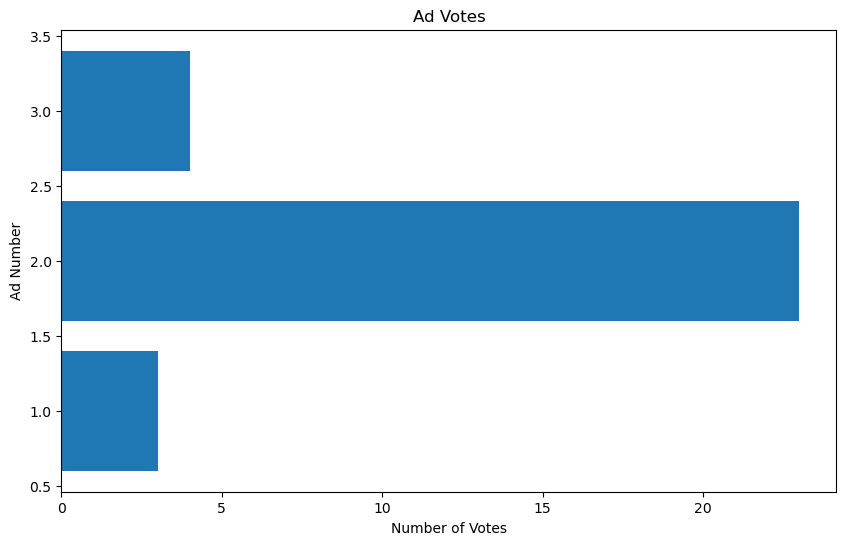

In [19]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(votes.keys()), list(votes.values()))
# Add labels and title
plt.xlabel('Number of Votes')
plt.ylabel('Ad Number')
plt.title('Ad Votes')
# Show the plot
plt.show()


Finally, we pick the winner ad.

In [20]:
# picks the most voted ad
winner = max(votes, key=votes.get)
winner

2